# AIM : Implementing the Perceptron Algorithm in Python
------------------------------

### Introduction 

The Perceptron algorithm was inspired by the basic processing units in the brain, called neurons, and how they process signals. It was invented by Frank Rosenblatt, using the McCulloch-Pitts neuron and the findings of Hebb.


<img src= "https://miro.medium.com/max/875/1*xcEOFhZLyyo3uxzAt6KndQ.png">

### Import Libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
%matplotlib inline

### Import dataset using sklearn.datasets libary

In [2]:
X , Y = datasets.make_blobs(n_samples=150,n_features=2,centers=2,cluster_std=1.05,random_state=2)

In [3]:
X

array([[-5.32783010e-01, -1.64847081e+00],
       [-5.50226372e-01, -1.16166152e+01],
       [ 1.38862276e+00, -1.43580590e+00],
       [ 1.37033956e+00, -6.40220712e-01],
       [-8.80606388e-01, -9.70946740e+00],
       [-2.22746033e+00, -1.01019963e+01],
       [-3.83660791e+00, -9.36311253e+00],
       [-2.61500332e-01, -1.80587922e+00],
       [ 1.18267985e+00, -7.12729660e-01],
       [-8.91135194e-01, -8.05385981e+00],
       [-3.42244116e+00, -9.43290706e+00],
       [-3.24159714e+00, -7.66373146e+00],
       [-8.14411765e-02, -1.76413571e+00],
       [ 2.82215236e+00, -1.76342807e+00],
       [ 1.90632766e+00, -2.43499725e+00],
       [ 1.12041042e+00, -2.18272234e+00],
       [ 4.12652646e-01, -9.79048994e-01],
       [-1.61986103e+00, -9.03645942e+00],
       [ 1.24676117e+00, -7.71255216e-01],
       [-2.01362140e+00, -1.04568119e+01],
       [-6.48510353e-01, -9.47763290e+00],
       [ 1.90763236e+00, -6.71105011e-01],
       [-7.57264801e-01, -9.34864598e+00],
       [ 2.

In [4]:
Y

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1])

### Visualise dataset using matplotlib libary

Text(0.5, 1.0, 'Classification Of Data with 2 classes')

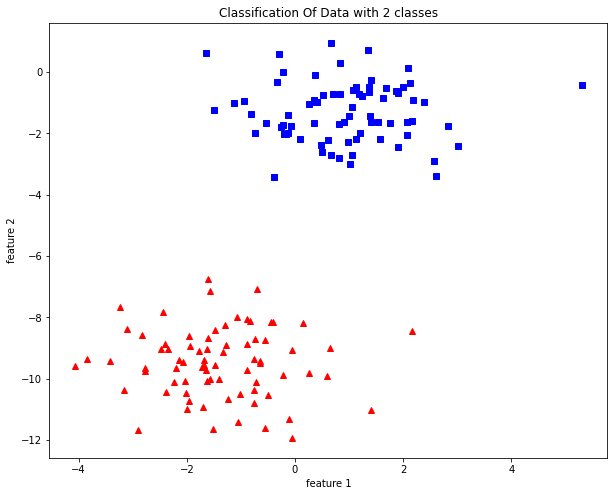

In [5]:
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][Y == 0], X[:, 1][Y == 0], 'r^')
plt.plot(X[:, 0][Y == 1], X[:, 1][Y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Classification Of Data with 2 classes')

There are two classes, red and green, and we want to separate them by drawing a straight line between them. 

For the Perceptron algorithm, we apply a Unit Step Function, which is defined as

<img src="https://miro.medium.com/max/576/1*sSxVjxnTEvGQTSHASOD68Q.png">

This function says that if the output is greater than or equal to zero, then the model will classify 1(red for example) and if the output is less than zero, the model will classify as 0(green for example). And that is how the perception algorithm classifies.

### Define a unit step function(Activations Function)

In [6]:
def step_func(z):
        return 1 if (z > 0) else 0

### Define Perceptron Algorithm

In [7]:
def perceptron(X, Y, lr, epoch):
    
    # X --> Inputs
    # y --> labels/target
    # lr --> learning rate
    # epoch --> Number of iterations
    
    # m-> number of training examples
    # n-> number of features 
    
    m, n = X.shape
    
    # Initializing weight to zeros and +1 in n+1 for the bias term.
    weight = np.zeros((n+1,1))
    
    # Empty list to store how many examples were misclassified at every iteration.
    n_miss_list = []
    
    # Training
    for i in range(epoch):
        
        # variable to store misclassified.
        n_miss = 0
        
        # looping for every example.
        for j, x_i in enumerate(X):
            
            # Insering 1 for bias that is X0 = 1
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)
            
            # Calculating prediction
            Y_hat = step_func(np.dot(x_i.T, weight))
            
            # Updating if the example is misclassified.
            if (np.squeeze(Y_hat) - Y[j]) != 0:
                weight += lr*((Y[j] - Y_hat)*x_i)
                
                # Incrementing by 1
                n_miss += 1
        
        # Appending number of misclassified examples at every iteration.
        n_miss_list.append(n_miss)
        
    return weight, n_miss_list

### Define A Function For Plotting Decision Boundary

In [8]:
def plot_decision_boundary(X, weight):
    
    # X --> Inputs
    # weight --> parameters
    
    # The Line is y=mx+c So, Equate mx+c = weight0.X0 + weight1.X1 + weight2.X2
    
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -weight[1]/weight[2]
    c = -weight[0]/weight[2]
    x2 = m*x1 + c
    
    # Plotting
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][Y==0], X[:, 1][Y==0], "r^")
    plt.plot(X[:, 0][Y==1], X[:, 1][Y==1], "bs")
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title("Perceptron Algorithm")
    plt.plot(x1, x2, 'y-')

### Training and Plotting

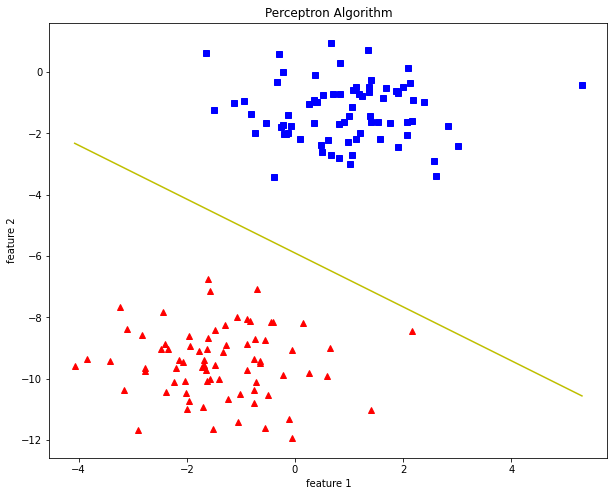

In [9]:
# Learning rate(lr) = 0.5
# Epoch = 100
weight, n_miss_list = perceptron(X, Y, 0.5, 100)
plot_decision_boundary(X, weight)

As We can see that we are able to separate the red and blue classes perfectly So, We get an accuracy of 100%.